# Introduction : Credit Score Classification

A credit score is a three digit number used to assess an individual’s creditworthiness which is, how reliable they are at borrowing and repaying money, it typically ranges from "Very Poor" to "Excellent" (HSBC, 2025). This score is widely used by landlords, utility companies, telecommunication providers, and especially financial institutions such as banks and loan agencies to evaluate risk and make informed decisions about lending or offering services. A high credit score indicates lower risk and often results in better interest rates for the customer, while a low score signals higher risk and can lead to limited borrowing opportunities.


The aim of this project  is to build machine learning models specifically Decision Tree and Random Forest classifiers which will be used to to categorise individuals into credit score brackets: Poor, Standard, and Good, based on their credit-related information. These models aim to reduce manual effort in credit assessment by accurately predicting credit score classifications. Model performance was evaluated using metrics such as precision, recall, F1-score and accuracy to ensure reliability and effectiveness.

The models used in this project are classification algorithms under supervised machine learning. A Decision Tree is a flowchart-like structure where data is split based on feature thresholds to form decision rules, making it intuitive and easy to interpret. However, it is prone to overfit which limits its ability to be generalised. To address this, the Random Forest algorithm, an ensemble method that builds multiple decision trees and averages their results, was implemented. It improved performance by reducing variance and overfitting, especially when working with noisy or complex datasets.

Results from model training and evaluation show that the Random Forest model performed significantly better, with higher accuracy (79%) and more scaled balance classification across credit score categories. Nonetheless, limitations due to class imbalance and dataset structure constrained the final performance.

Problem Statement:

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

Task:

Given an individual’s credit-related information, build machine learning models that can classify the credit score.

from:

https://www.kaggle.com/datasets/humagonen/credit-score-clean-dataset

https://www.kaggle.com/datasets/parisrohan/credit-score-classification



In [ ]:
#important libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, RobustScaler

#Hide warnings
import warnings
warnings.filterwarnings("ignore")

## Load datasets


In [ ]:
# to access data in drive
from google.colab import drive
drive.mount('/content/drive')

# Load the training and testing dataset downloaded from Kaggle "humagonen/credit-score-clean-dataset" respectively.

train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MA336_AI/Creditscore_train_cleaned.csv")
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MA336_AI/Creditscore_test_cleaned.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Print out information about the dataframes
train.info()
test.info()

#printing the dimenstion of each dataframe
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92285 entries, 0 to 92284
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        92285 non-null  int64  
 1   Occupation                 92285 non-null  object 
 2   Annual_Income              92285 non-null  float64
 3   Num_Bank_Accounts          92285 non-null  int64  
 4   Num_Credit_Card            92285 non-null  int64  
 5   Interest_Rate              92285 non-null  int64  
 6   Num_of_Loan                92285 non-null  int64  
 7   Delay_from_due_date        92285 non-null  int64  
 8   Num_of_Delayed_Payment     92285 non-null  float64
 9   Num_Credit_Inquiries       92285 non-null  float64
 10  Credit_Mix                 92285 non-null  object 
 11  Outstanding_Debt           92285 non-null  float64
 12  Credit_Utilization_Ratio   92285 non-null  float64
 13  Payment_of_Min_Amount      92285 non-null  obj

The train dataset contains 92285 observations (i.e. people), 20 features including the target variable Credit_Score (the 20th). While the test dataset has 46120 observations and 19 features.

## Preliminary analysis
Data Exploratory Analysis and data cleaning were only conducted on the training dataframe, the testing dataframe remained unedited until evalution with the developed models (exept for some variable convertion). Missing values, class distribution, feature corrleation and data types were all analysed to determine how to further handle and procces the data to obtain the disired outcome.

In [ ]:
#checking first 10 rows of the train dataframe
train.head(10)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.000000,4.0,Unknown,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2,265
1,23,Scientist,19114.12,3,4,3,4,5,4.000000,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2,268
2,23,Scientist,19114.12,3,4,3,4,6,31.202764,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2,269
3,23,Scientist,19114.12,3,4,3,4,8,4.000000,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,2,270
4,23,Scientist,19114.12,3,4,3,4,3,8.000000,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,2,271
5,23,Scientist,19114.12,3,4,3,4,3,6.000000,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,1,362
6,28,Other,34847.84,2,4,6,1,3,4.000000,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1,319
7,28,Teacher,34847.84,2,4,6,1,7,1.000000,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,2,320
8,28,Teacher,34847.84,2,4,6,1,3,3.000000,2.0,Good,605.03,39.182656,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,2,322
9,28,Teacher,34847.84,2,4,6,1,3,1.000000,2.0,Good,605.03,34.977895,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,2,323


Occupation, credit mix, payment of min amount and payment behaviour all need to be in numerical formats (encoding) for the model to work.

NOTE:
- Poor (0)
- Standard (1)
- Good (2)

In [ ]:
# calculating class distribution for target variable Credit_Score
cred_prob= round(train["Credit_Score"].value_counts(normalize=True),2) #calculation of relative frequencies (probabilities) of each group

print("Probability of each class is:", cred_prob)

Probability of each class is: Credit_Score
1    0.53
0    0.29
2    0.17
Name: proportion, dtype: float64


The class imbalance for the target variable (credit_score) groups: Standard is split (53%), Poor mild (29%) and Good moderately split (17%). Unless this is handled it may skeew the model accuray.

In [ ]:
#Determination of the accuracy of correctly predicting that the customer is not in each respective group
print(round(1-cred_prob,2))

Credit_Score
1    0.47
0    0.71
2    0.83
Name: proportion, dtype: float64



The train dataframe is in a tidy format with observations in rows and features and the target variable in columns. The feature description are as follows:

**Age**: Age of the individual.

**Occupation**: Occupation title of the individual.

**Annual_Income**: Annual income of the individual.

**Num_Bank_Accounts**: Number of bank accounts the individual has.

**Num_Credit_Card**: Number of credit cards the individual has.

**Interest_Rate**: Interest rate applied on loans.

**Num_of_Loan**: Number of loans the individual  has.

**Delay_from_due_date**: Number of days delayed from due date for payments.

**Num_of_Delayed_Payment**: Number of delayed payments made by the individual.

**Num_Credit_Inquiries**: Number of credit card inquiries made by the individual.

**Credit_Mix**: Mix of credit accounts held by the individual.

**Outstanding_Debt**: Remaining debt to be paid.

**Credit_Utilization_Ratio**: Utilization ratio of credit card.

**Credit_History_Age_Months**: Age of credit history of the individual in months.

**Payment_of_Min_Amount**: Indicates if minimum payment amount was paid by the individual.

**Total_EMI_per_month**: Total Equated Monthly Installment (EMI) paid by the individual.

**Amount_invested_monthly**: Amount invested monthly by the individual.

**Payment_Behaviour**: Payment behavior of the individual.

**Monthly_Balance**: Monthly balance amount of the individual.

**Credit_Score**: Represents the brackets of credit score (Poor, Standard, Good). -Target variable

### Exploaratory Data Analysis (EDA)

EDA was conducted to better understand the dataset and ensure data quality before model building. This involved identifying and handling missing values and duplicate rows, which could otherwise introduce noise or bias. Measures of spread and distribution, such as mean, median, and standard deviation were analysed to gain insights into how the data is distributed across different features. Addressing these factors during EDA helps build a more robust and reliable classification model.

The class balance of the target variable, Credit_Score, was not balanced (thus imbalanced) dataset which is expected to significantly impact model performance and lead to biased predictions. This issuse was not resolved.


In [ ]:
#Missing values in train
print(f"Missing values in training dataset are: {train.isnull().sum()}") #checking

#Missing values in test
print(f"Missing values in testing dataset are: {test.isnull().sum()}") #checking

Missing values in training dataset are: Age                          0
Occupation                   0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64
Missing values in testing dataset are: Age                          0
Occupation                   0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Num_Credi

In [ ]:
#checking for duplicate rows in train dataset
print(f"Total number of duplicate rows in the training dataframe :", train.duplicated().sum())

Total number of duplicate rows in the training dataframe : 0


In [ ]:
#Basic statistics -- to get overview of spread of observations
print(train.describe().T) # by default only calculates using numerical mode variables

                             count           mean           std         min  \
Age                        92285.0      33.272092  1.077036e+01    14.00000   
Annual_Income              92285.0  176619.791545  1.432648e+06  7005.93000   
Num_Bank_Accounts          92285.0      17.117441  1.172669e+02     0.00000   
Num_Credit_Card            92285.0      22.489083  1.290038e+02     0.00000   
Interest_Rate              92285.0      72.714569  4.677900e+02     1.00000   
Num_of_Loan                92285.0       7.121385  5.979543e+01     0.00000   
Delay_from_due_date        92285.0      21.302595  1.480184e+01     0.00000   
Num_of_Delayed_Payment     92285.0      31.204865  2.181574e+02     0.00000   
Num_Credit_Inquiries       92285.0      27.844756  1.912903e+02     0.00000   
Outstanding_Debt           92285.0    1436.257452  1.159649e+03     0.23000   
Credit_Utilization_Ratio   92285.0      32.283737  5.115003e+00    20.00000   
Total_EMI_per_month        92285.0    1403.943604  8

In [ ]:
#checking the statsitics of categorical variables--table of train df descrptive stats for object types
print(train.describe(include= ["object"]).T)

                       count unique                             top   freq
Occupation             92285     16                           Other   6501
Credit_Mix             92285      4                        Standard  34128
Payment_of_Min_Amount  92285      3                             Yes  48963
Payment_Behaviour      92285      6  Low_spent_Small_value_payments  30651


In [ ]:
# further inspections for odd observations in train dataset that may need to be handled
for i in train.columns:
  if train[i].dtype == "object":
    print(i, train[i].unique()) #print column name and odd observations in them

Occupation ['Scientist' 'Other' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'MediaManager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Credit_Mix ['Unknown' 'Good' 'Standard' 'Bad']
Payment_of_Min_Amount ['No' 'NM' 'Yes']
Payment_Behaviour ['High_spent_Small_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Large_value_payments']


So far every variable is in the correct format, not missing any values, no duplicates and unique observations are how they are supposed to be. Thus we can move on to produce accurate visualisations.

In [ ]:
train.dtypes

,0
Age,int64
Occupation,object
Annual_Income,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,int64
Delay_from_due_date,int64
Num_of_Delayed_Payment,float64
Num_Credit_Inquiries,float64


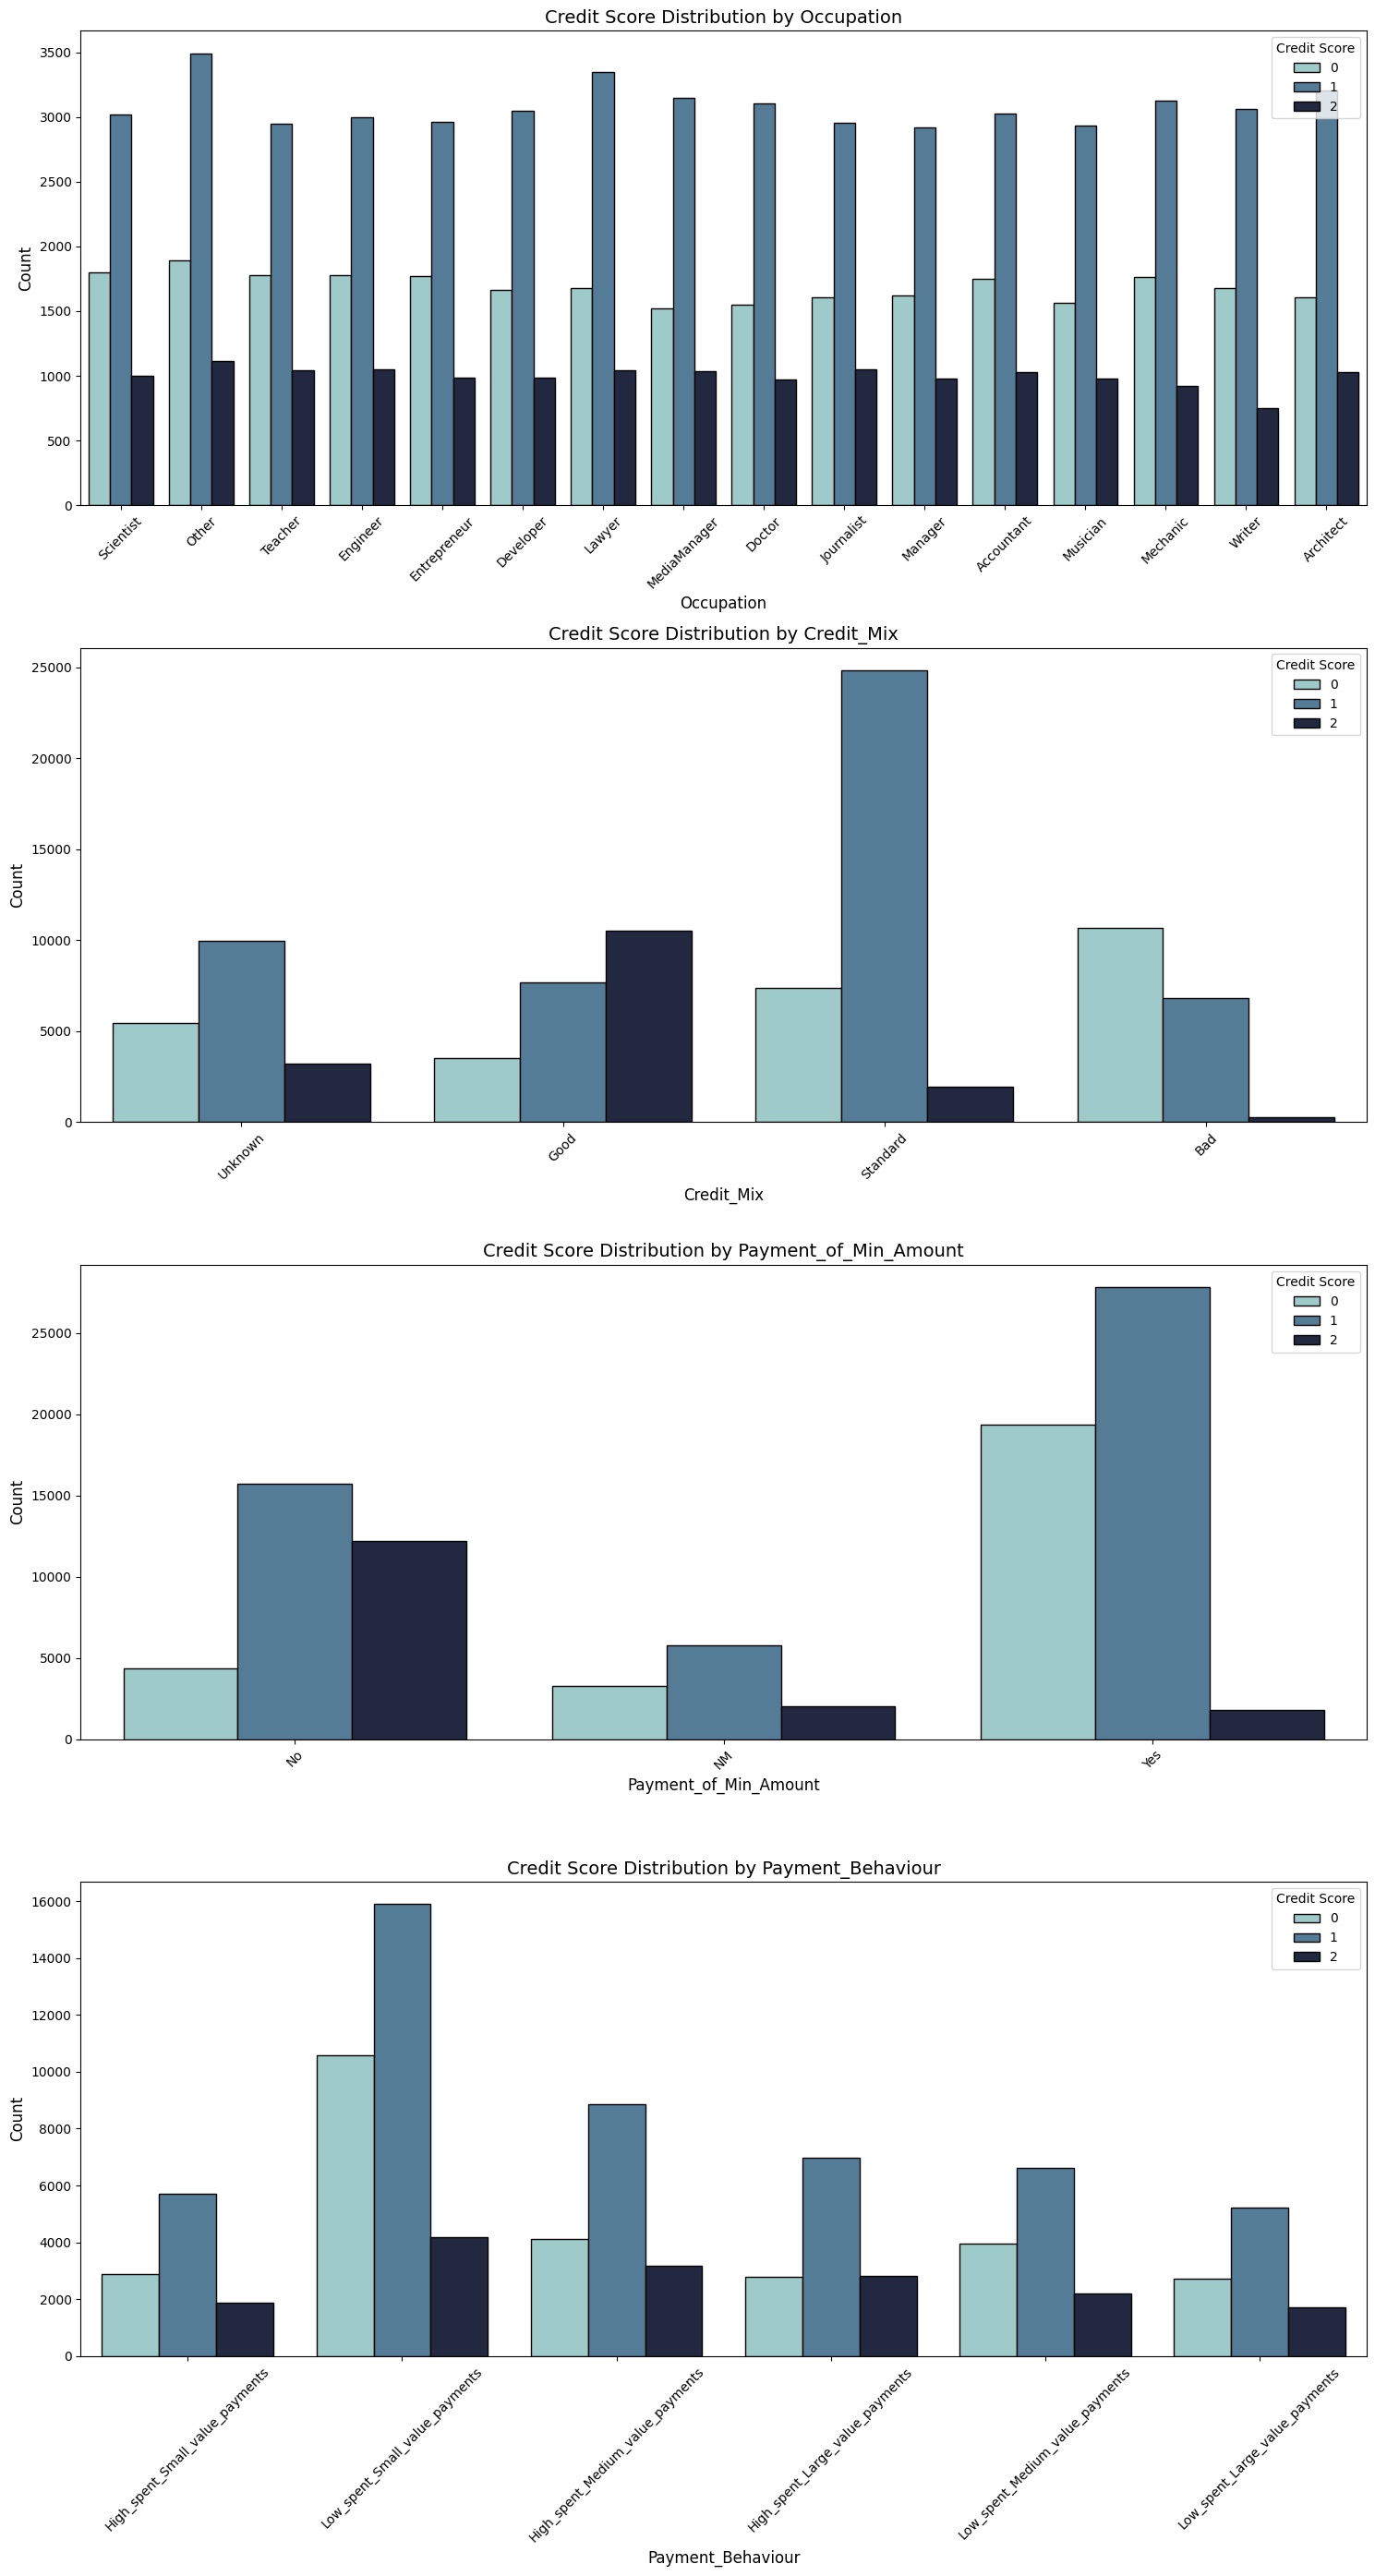

In [ ]:
# Bar plots for categorical (object) variables

categorical_variables = train.select_dtypes(include=["object"]).columns

plt.figure(figsize=(15, 7*len(categorical_variables)))

# Loop through each categorical variable
for i, variable in enumerate(categorical_variables, 1):
    # Create a subplot for each variable (arranged vertically)
    plt.subplot(len(categorical_variables), 1, i)

    # Create the plot using seaborn
    sns.countplot(data=train, x=variable, hue="Credit_Score",
                 palette="ch:rot=-.25,hue=1,light=.75", edgecolor="black")

    # Add title and labels
    plt.title(f"Credit Score Distribution by {variable}", fontsize=14)
    plt.xlabel(variable, fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=45)

    # Add legend
    plt.legend(title="Credit Score")

    # Adjust layout to prevent overlapping
    plt.tight_layout()

# Show all plots at once
plt.show()

<Axes: >

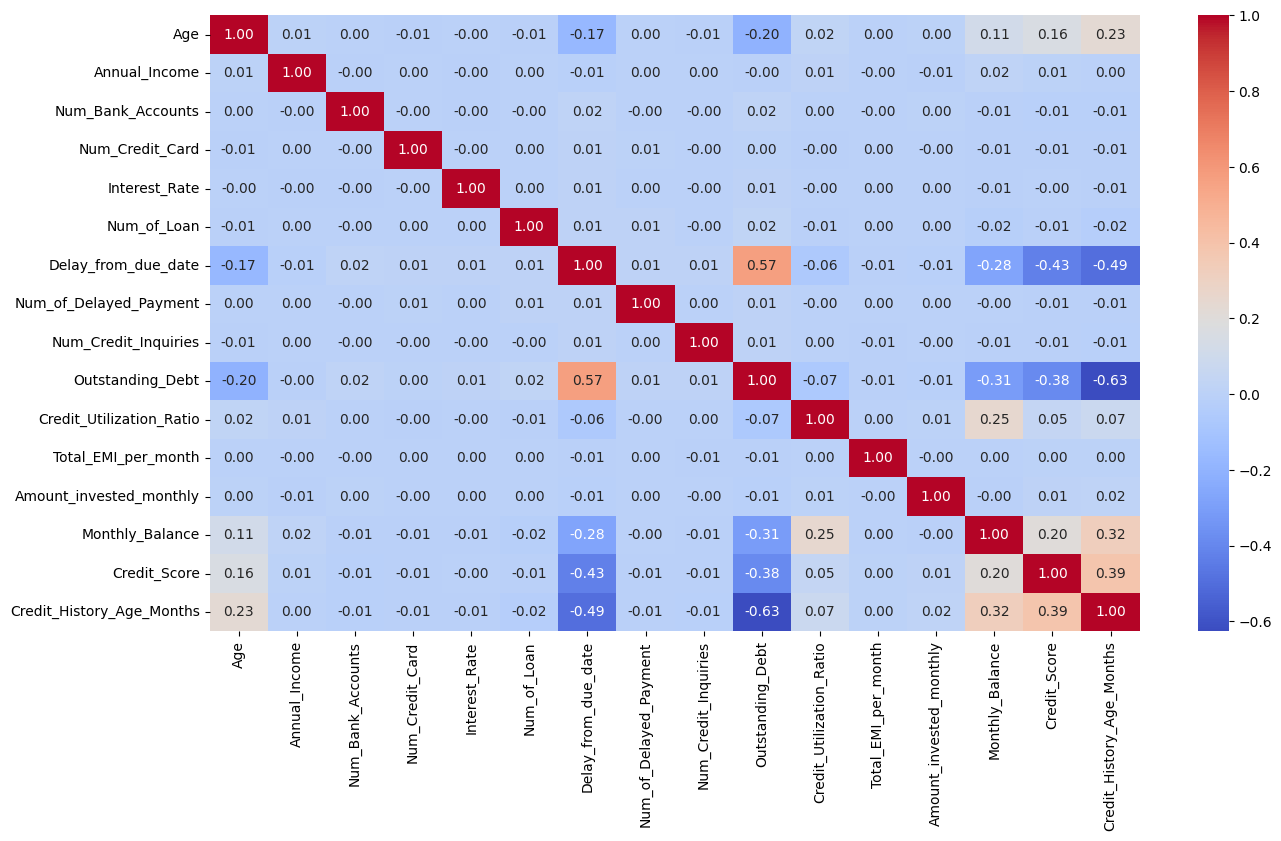

In [ ]:
#correlation heatmap of all variables
#from __future__ import annotations
plt.figure(figsize=(15, 8))

sns.heatmap(train.select_dtypes("number").corr(), annot= True, fmt=".2f", cmap= "coolwarm")

The correlation heatmap (shown above) was generated using the Pearson correlation coefficient (.corr) to identify linear relationships between numerical features. Coefficients range from -1 to 1, where 1 represents a perfect positive correlation, -1 a perfect negative correlation, and 0 indicates no correlation. In the heatmap, red tones indicate positive correlations, while blue tones represent negative ones. A strong positive correlation was observed between Outstanding_Debt and Delay_from_due_date (0.57), implying that individuals with higher debt are more likely to delay payments. Similarly, Credit_History_Age_Months showed moderate positive correlations with both Credit_Score (0.39) and Monthly_Balance (0.32), suggesting that longer credit histories are weakly associated with better scores and higher monthly balances. On the other hand, several negative correlations were also noted, such as Outstanding_Debt with Credit_Score (-0.63), and Delay_from_due_date with Credit_Score (-0.43), indicating that increased delays and higher debt negatively impact creditworthiness.


### Data Cleaning

To produce other plots all variables need to be in numeric format. This had to be done for both test and train datasets.

In [ ]:
#convert 8 variables in train and test to numeric

#Checking
#train.select_dtypes("object")
#test.select_dtypes("object")

# Identify remaining object columns in train & test
object_cols_train = train.select_dtypes(include=["object"]).columns.tolist()

# Label Encoding (for ordinal categories)
from sklearn.preprocessing import LabelEncoder

for col in object_cols_train:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))  # Handle potential mixed types with (str)
    test[col] = le.transform(test[col].astype(str))

# Verify conversion
print("Train dtypes after conversion:\n", train.dtypes)
print("\nTest dtypes after conversion:\n", test.dtypes)

Train dtypes after conversion:
 Age                            int64
Occupation                     int64
Annual_Income                float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                    int64
Delay_from_due_date            int64
Num_of_Delayed_Payment       float64
Num_Credit_Inquiries         float64
Credit_Mix                     int64
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount          int64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour              int64
Monthly_Balance              float64
Credit_Score                   int64
Credit_History_Age_Months      int64
dtype: object

Test dtypes after conversion:
 Age                            int64
Occupation                     int64
Annual_Income                float64
Num_Bank_Accounts              int64
Num_Credit_Card                int

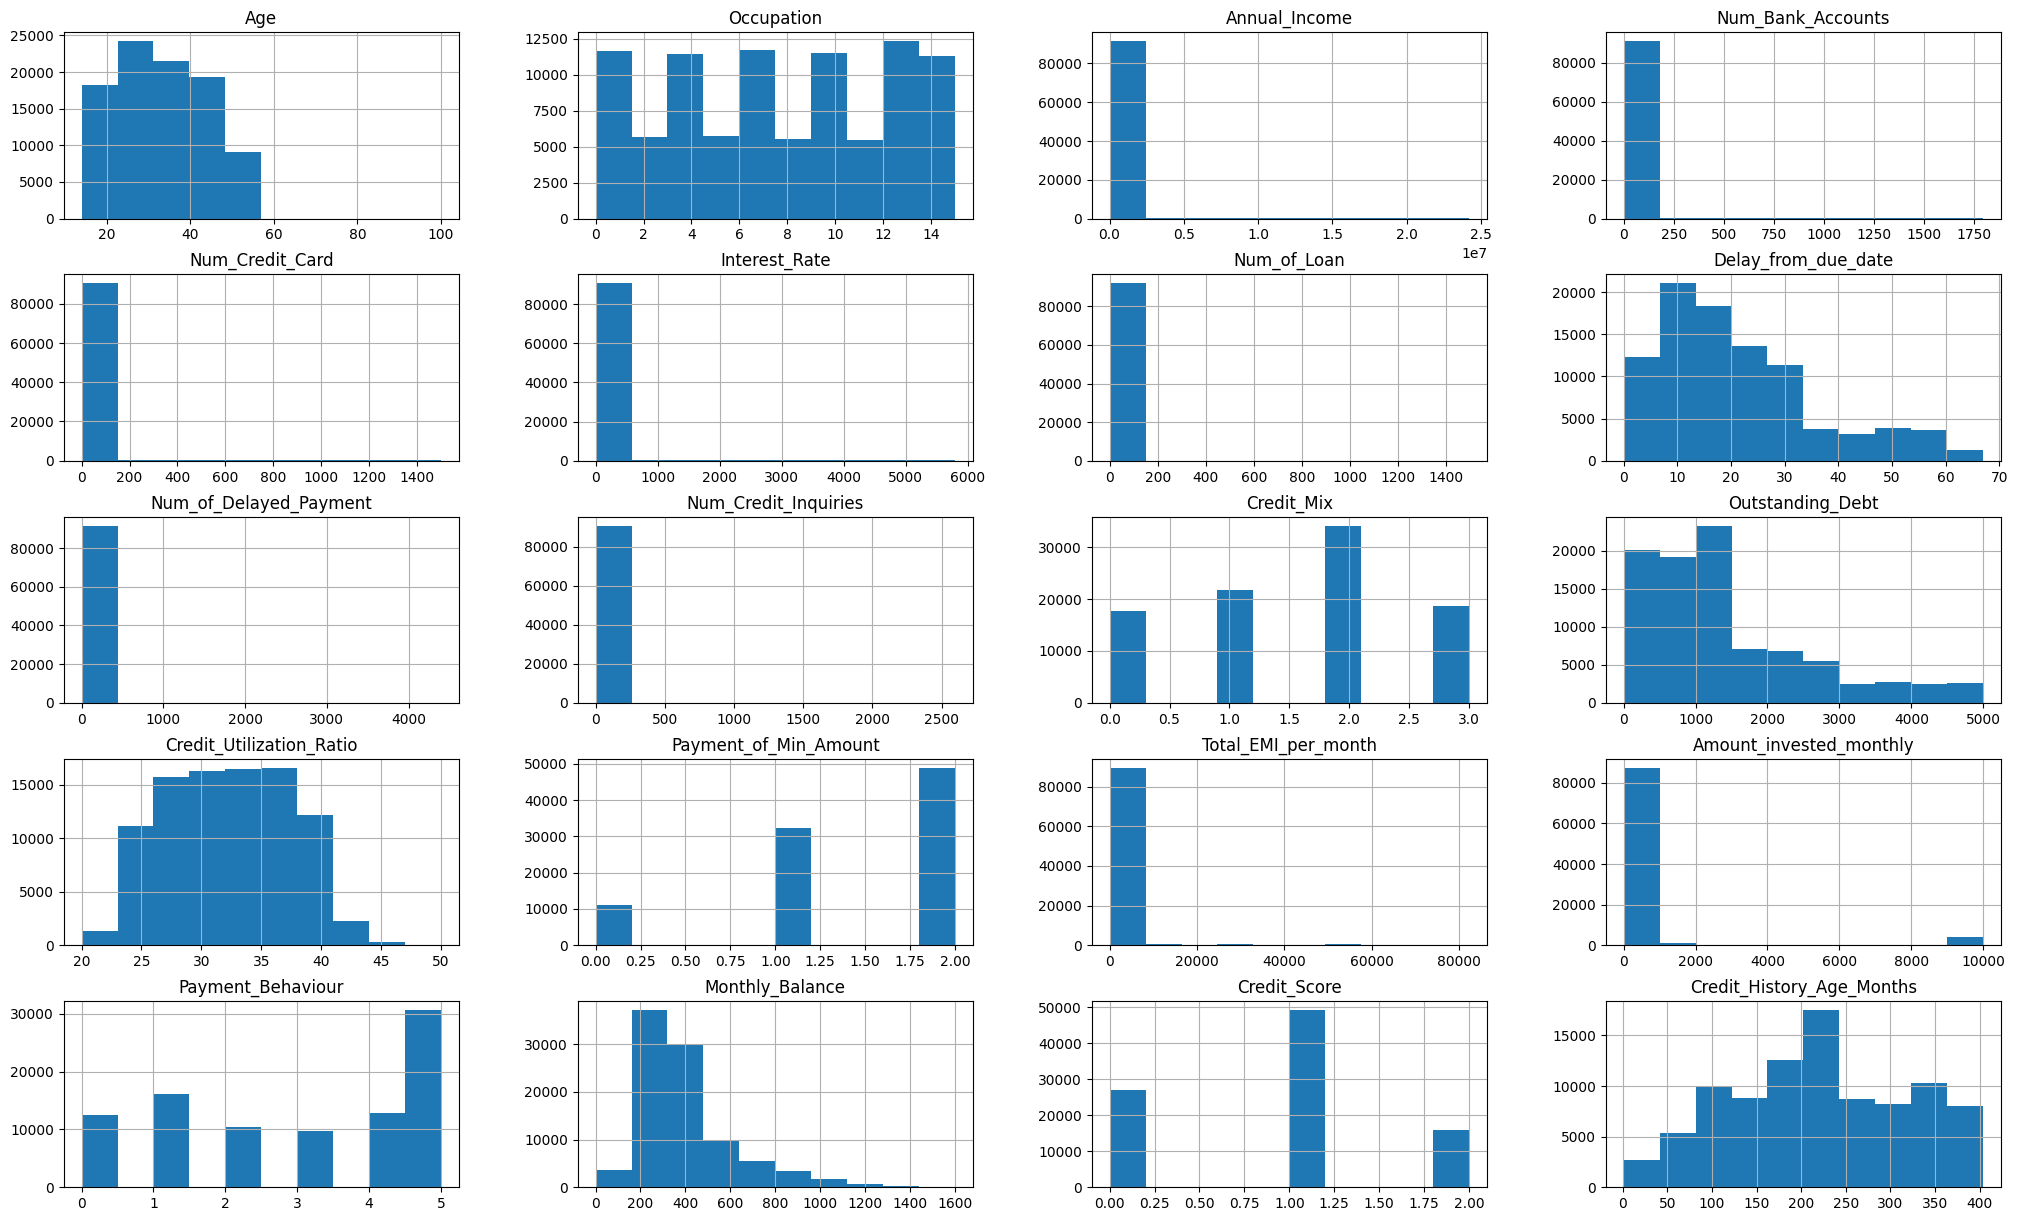

In [ ]:
# Histograms for all (numerical) variables
train.hist( figsize=(25, 15))
plt.show()

In [ ]:
#check coding for credit score
train["Credit_Score"].value_counts()

,count
Credit_Score,
1,49293
0,27013
2,15979


#### Credit_Score Plot (target variable)

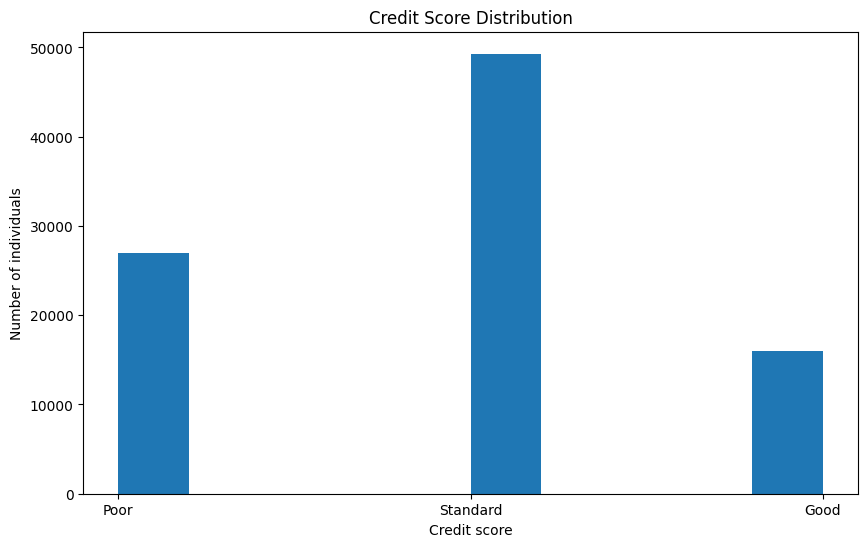

In [ ]:
#plot for credit score each category distribution--Target variable
plt.figure(figsize=(10, 6))
plt.hist(train["Credit_Score"], bins=10, color="tab:blue")
plt.title("Credit Score Distribution")
plt.xlabel("Credit score")
plt.ylabel("Number of individuals")
plt.xticks(ticks=[0, 1, 2], labels=[ "Poor", "Standard","Good"])  # 0= Poor, 1=Standard, 2=Good

plt.show()

#### Target vs. Features boxplot

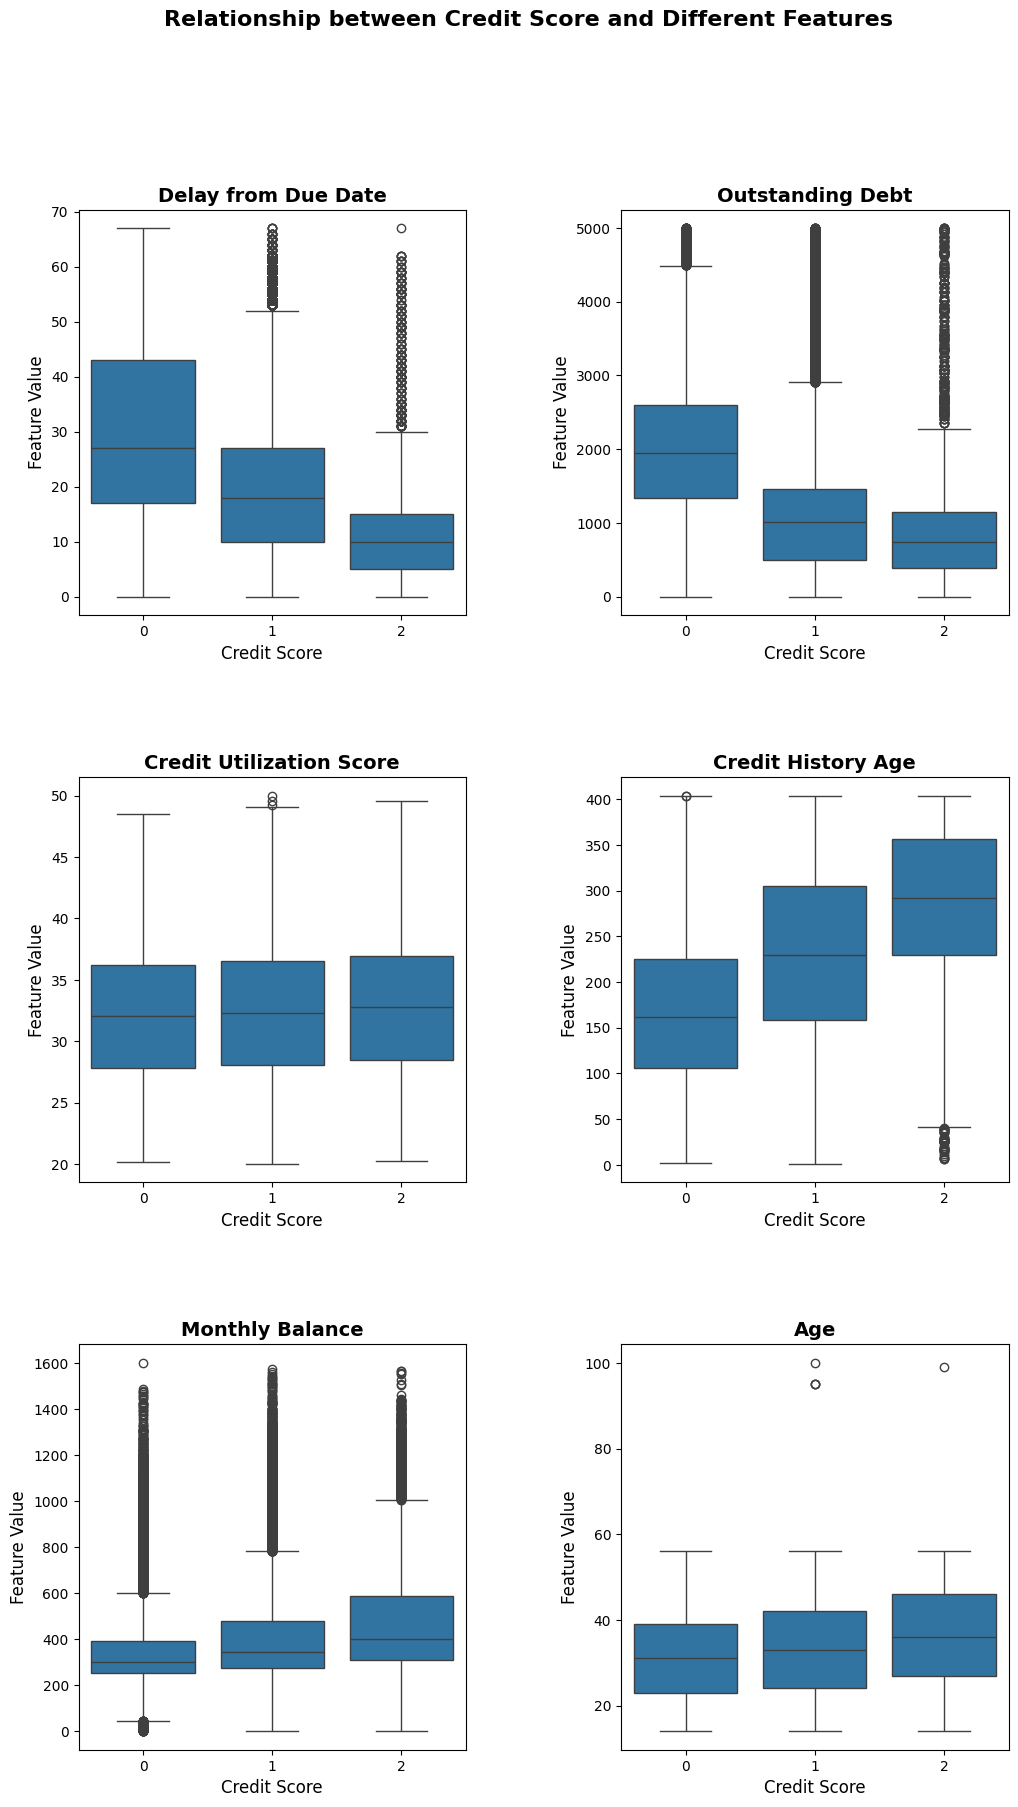

In [ ]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(3,2, figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Plot multiple box plots on the same axis

sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=train, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=train, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=train, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Credit_History_Age_Months', data=train, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=train, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Age', data=train, ax=ax[5])

# Add title and labels
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Feature Value')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add white grid
for i in range(6):
    ax[i].grid(color='white', linestyle='-', linewidth=2, alpha=0.5)


# Set font size for all subplot titles
titles = [ 'Delay from Due Date','Outstanding Debt', 'Credit Utilization Score', 'Credit History Age',
           'Monthly Balance','Age']
for i in range(6):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

# Set font size for all x and y labels
for i in range(6):
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

# Show the plot
plt.show()

Observations from boxplots:

**Delay from Due Date**: A delay window of 5–14 days appears to be acceptable without significantly affecting credit scores. However, delays beyond 17 days begin to negatively impact creditworthiness. Additionally, 4–12 delayed payments are within a "safe" threshold, while more than 12 can lead to score drops.

**Outstanding Debt**: Credit scores remain unaffected by debts up to 1150 (USD), but surpassing 1338 (USD) correlates with a noticeable decline in score, highlighting the importance of maintaining manageable debt levels.

**Credit Utilization Ratio**: Surprisingly, this factor does not show a strong relationship with credit score in this dataset, suggesting it may carry less weight than expected in this particular context.

**Credit History Age**: A longer credit history has a clear positive impact on credit scores, reinforcing the idea that financial longevity builds trust.

**Amount Invested Monthly**: The amount of money invested each month does not significantly influence credit scores, indicating it may be a less critical factor.

**Monthly Balance**: Maintaining a high end-of-month balance is associated with better credit scores, possibly reflecting good financial habits and liquidity.

**Age**: Credit scores tend to improve with increasing age, likely due to longer credit histories and more established financial behavior.


#### Payment_Behaviour and Credit_Score heatmap

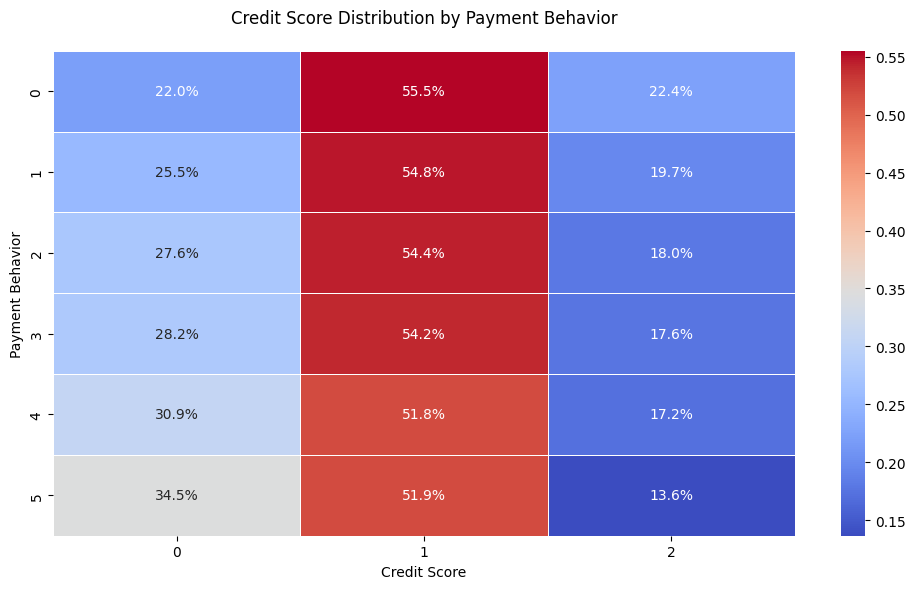

In [ ]:
#payment behaviour and credit score plot
# Create cross-tabulation
payment_matrix = pd.crosstab(train['Payment_Behaviour'],
                            train['Credit_Score'],
                            normalize='index')  # Get percentages

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(payment_matrix, annot=True, fmt='.1%',cmap="coolwarm",linewidths=0.5)
plt.title('Credit Score Distribution by Payment Behavior', pad=20)
plt.xlabel('Credit Score')
plt.ylabel('Payment Behavior')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Methods

To develop the supervised machine learning models, the credit score classification data was analysed using EDA and data cleaning steps. Relevant plots such as feature-target boxplots and correlation heatmaps were constructed to better understand feature distributions, relationships between variables, and the balance of the target variable.

Two supervised machine learning algorithms were implemented: Decision Tree and Random Forest. A Decision Tree is a flowchart-like model that makes decisions by splitting the data based on feature values (using metrics like Gini impurity), essentially forming a hierarchy of decision rules. It is simple and interpretable but prone to overfitting, especially on noisy datasets.

To address this limitation, a Random Forest model was used. Random Forest is an ensemble learning method that builds multiple decision trees on different data subsets and averages their predictions to produce a more generalized and stable model.

Both models were trained using a stratified 80-20 train-test split on the original training data, as the provided test dataset lacked labels. This approach allowed for model training on 80% of the data and performance evaluation on the remaining 20%, simulating a real-world deployment pipeline while avoiding data leakage.

To evaluate model performance, the following classification metrics were used:

**Accuracy**: Proportion of correctly predicted instances.
**Precision**: How many of the positive predictions were actually positive (important for avoiding false positives).
**Recall**: How many actual positives were correctly predicted (important for minimizing false negatives).
**F1-score**: mean of precision and recall, useful for imbalanced data.


Additionally, accuracy as a function of max depth was computed, to determine the at which max-depth paramtre value would the decision tree yeild the best results.Lastly, feature importance analysis identified the most influential predictors of credit score classification.

In [ ]:
#imporant libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree #import model
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## Decision Tree Model


In [ ]:
#1. Spliting train data 80% to train model and 20% to evaluate model before unsing on unseen test data as it is unlabled

X= train.drop("Credit_Score", axis=1) # Input variables
X_names = train.columns.tolist() # feature names without target variable
y=train["Credit_Score"]  # Target variable
y_names=["Poor","Standard","Good"] # Target labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)

In [ ]:
#2. Train Decision Tree (with optimal hyperparameters)

#create dt model

#define optimal hyperparameters
class_weights = {
    0: 1.7,  # Poor (29% of data) - moderate emphasis
    1: 1.0,  # Standard (53%) - baseline
    2: 2.5   # Good (17%) - strongest emphasis
}

# model
dt= tree.DecisionTreeClassifier(max_depth = 3,
                                            min_samples_split=20,
                                            class_weight= class_weights, #trying to reflect class imbalance
                                            random_state=100)

# training dt model using train
dt.fit(X_train,y_train)

#Generate predictions using simulated test Data = X_val and y_val
y_val_pred = dt.predict(X_val)

#FIGURE 1. classification report for Decision tree on Validation data, which is the 20% split of the original train dataset
#classification report for the validation data which is the simulated test Data = X_val and y_val
#print("Validation Set Performance:")
#print(classification_report(y_val, y_val_pred, target_names=["Poor", "Standard", "Good"]))

# Print the model accuracy (how often is the classifier correct?)
#print("Accuracy on validation set:",np.round(metrics.accuracy_score(y_val, y_val_pred),2))

In [ ]:
#3. Deeper model evaluation

#FIGURE 2. Confusion matrix for Validation data, showing true pos., true neg, false pos., false neg.
#plot confusion matrix
#cm = confusion_matrix(y_val, y_val_pred, labels=[0, 1, 2])
#display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Poor", "Standard", "Good"])
#display.plot(cmap="Blues")
#plt.title("Validation Set Confusion Matrix")
#plt.show()

#FIGURE 3. Decision tree visualisation (simplified)
#plt.figure(figsize=(20,10))
#plot_tree(dt, feature_names= X_names, class_names=["Poor", "Standard", "Good"], filled=True, max_depth=3,  # Show first 3 levels for readability proportion=True)

#plt.title("Decision Tree (First 3 Levels)")
#plt.show()


In [ ]:
# Retrain on FULL train.csv (Note: validation is not great)
dt_final = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=20,
    class_weight=class_weights,
    random_state=100)

dt_final.fit(train.drop("Credit_Score", axis=1), train["Credit_Score"])

# Save Prediction on test.csv (no evaluation possible)
test_predictions = dt_final.predict(test)
print("\nPredictions saved for test.csv")


Predictions saved for test.csv


## Accuracy as a function of Max Depth

In [ ]:
#4. Accuracy as a function of max depth to assess for model overfitting
# shows how we can tune max depth parametre to get best peforming model

# Hyperparameter Tuning Visualisation (max_depth)
max_depth_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
accuracy_train = []
accuracy_valid = []  # Using validation (simualted test) accuracy

for depth in max_depth_vals:
    # Create and train decision tree
    dt = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=20,
        class_weight=class_weights,
        random_state=100)

    dt.fit(X_train, y_train)

    # Train set accuracy
    y_train_pred = dt.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))

    # Test set accuracy using simulated test Data = X_val and y_val
    y_val_pred = dt.predict(X_val)
    accuracy_valid.append(metrics.accuracy_score(y_val, y_val_pred))

#FIGURE 4. Accuracy as a function of max depth, to get optimal max-depth parametre for optimal model performance
# Plot accuracy vs max_depth
#plt.figure(figsize=(10, 6))
#plt.plot(max_depth_vals, accuracy_train, 'b-', label='Training Accuracy', marker='o')
#plt.plot(max_depth_vals, accuracy_valid, 'r-', label='Validation Accuracy', marker='o')
#plt.title('Accuracy vs. Max Depth (Validation Set)', fontsize=14)
#plt.xlabel('Maximum Tree Depth', fontsize=12)
#plt.ylabel('Accuracy', fontsize=12)
#plt.legend()
#plt.grid(True, alpha=0.3)

# Highlight best depth
#best_depth = max_depth_vals[accuracy_valid.index(max(accuracy_valid))]
#plt.axvline(x=best_depth, color='gray', linestyle='--', alpha=0.7)
#plt.text(best_depth+0.5, min(accuracy_valid)+0.1,
         #f'Best depth: {best_depth}\nValid acc: {max(accuracy_valid):.3f}',
         #fontsize=10)
#plt.show()

# Train Final Decision Tree with Optimal Depth on FULL training data
final_dt = DecisionTreeClassifier(
    max_depth=best_depth,
    min_samples_split=20,
    random_state=100
)
final_dt.fit(X_train, y_train)  # Using full training data

#FIGURE 5. Evaluate on TRAIN Data

#print("\n Final Accuracy vs. Max Depth Validation Set Performance:")
#y_val_pred = final_dt.predict(X_val)
#print(classification_report(y_val, y_val_pred, target_names=["Poor", "Standard", "Good"]))


DecisionTreeClassifier(max_depth=15, min_samples_split=20, random_state=100)

## Feature Importance

In [ ]:
#Feature Importance
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

#FIGURE 6. Barplot of Feature importance
#plt.figure(figsize=(10,6))
#sns.barplot(x='Importance', y='Feature', data=importances)
#plt.title("Feature Importance Ranking")
#plt.tight_layout()
#plt.show()

## Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,bootstrap=True,criterion='gini',max_depth=None,random_state=100,oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create the Random Forest classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100)

# Train rt classifier
rf_classifier.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = rf_classifier.predict(X_val)

#FIGURE 7. Classification report for Random forest on Validation data, the 20% split of the original train dataset
# Evaluate the rt model with the simulated test Data = X_val and y_val
#print("Random Forest Classifier Validation Set Performance:")
#print(classification_report(y_val, y_pred, target_names=["Poor", "Standard", "Good"]))

# Results

## The Decision tree model yeilded:

In [ ]:
#FIGURE 1. classification report for Decision tree on Validation data, which is the 20% split of the original train dataset
#classification report for the validation data which is the simulated test Data = X_val and y_val
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred, target_names=["Poor", "Standard", "Good"]))

# Print the model accuracy (how often is the classifier correct?)
print("Accuracy on validation set:",np.round(metrics.accuracy_score(y_val, y_val_pred),2))

Validation Set Performance:
              precision    recall  f1-score   support

        Poor       0.62      0.74      0.67      5403
    Standard       0.83      0.48      0.61      9858
        Good       0.41      0.80      0.54      3196

    accuracy                           0.61     18457
   macro avg       0.62      0.67      0.61     18457
weighted avg       0.69      0.61      0.62     18457

Accuracy on validation set: 0.61


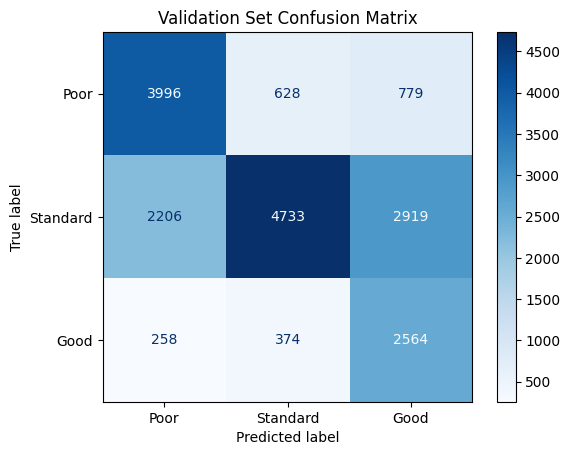

In [ ]:
#FIGURE 2. Confusion matrix for Validation data, showing true pos., true neg, false pos., false neg.
#plot confusion matrix
cm = confusion_matrix(y_val, y_val_pred, labels=[0, 1, 2])
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Poor", "Standard", "Good"])
display.plot(cmap="Blues")
plt.title("Validation Set Confusion Matrix")
plt.show()


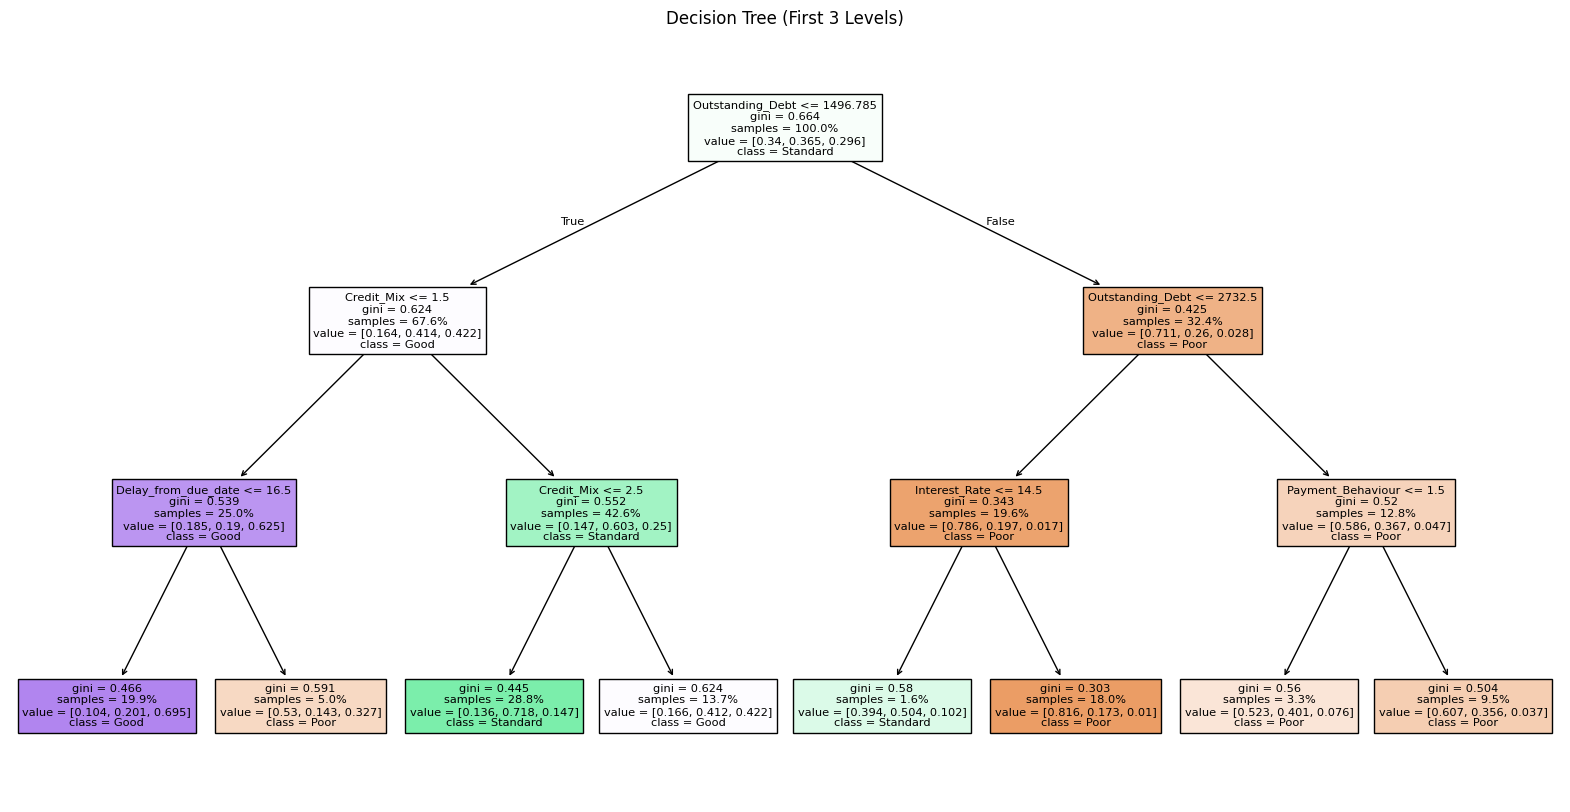

In [ ]:
#FIGURE 3. Decision tree visualisation (simplified)
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names= X_names, class_names=["Poor", "Standard", "Good"], filled=True,
          max_depth=3,  # Show first 3 levels for readability
          proportion=True)

plt.title("Decision Tree (First 3 Levels)")
plt.show()

## Accuracy as a function of max depth:

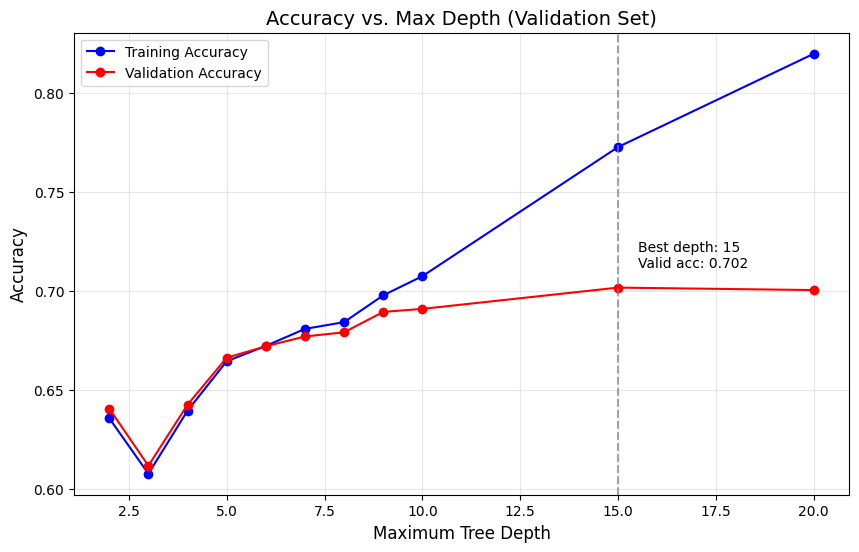


 Final Accuracy vs. Max Depth Validation Set Performance:
              precision    recall  f1-score   support

        Poor       0.70      0.71      0.71      5403
    Standard       0.76      0.73      0.74      9858
        Good       0.59      0.65      0.62      3196

    accuracy                           0.71     18457
   macro avg       0.68      0.70      0.69     18457
weighted avg       0.71      0.71      0.71     18457



In [ ]:
#FIGURE 4. Accuracy as a function of max depth, to get optimal max-depth parametre for optimal model performance
# Plot accuracy vs max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_vals, accuracy_train, 'b-', label='Training Accuracy', marker='o')
plt.plot(max_depth_vals, accuracy_valid, 'r-', label='Validation Accuracy', marker='o')
plt.title('Accuracy vs. Max Depth (Validation Set)', fontsize=14)
plt.xlabel('Maximum Tree Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Highlight best depth
best_depth = max_depth_vals[accuracy_valid.index(max(accuracy_valid))]
plt.axvline(x=best_depth, color='gray', linestyle='--', alpha=0.7)
plt.text(best_depth+0.5, min(accuracy_valid)+0.1,
         f'Best depth: {best_depth}\nValid acc: {max(accuracy_valid):.3f}',
         fontsize=10)
plt.show()

# Train Final Decision Tree with Optimal Depth on FULL training data
final_dt = DecisionTreeClassifier(
    max_depth=best_depth,
    min_samples_split=20,
    random_state=100
)
final_dt.fit(X_train, y_train)  # Using full training data

#FIGURE 5. Evaluate on TRAIN Data

print("\n Final Accuracy vs. Max Depth Validation Set Performance:")
y_val_pred = final_dt.predict(X_val)
print(classification_report(y_val, y_val_pred, target_names=["Poor", "Standard", "Good"]))

## Barplot of Feature importance:

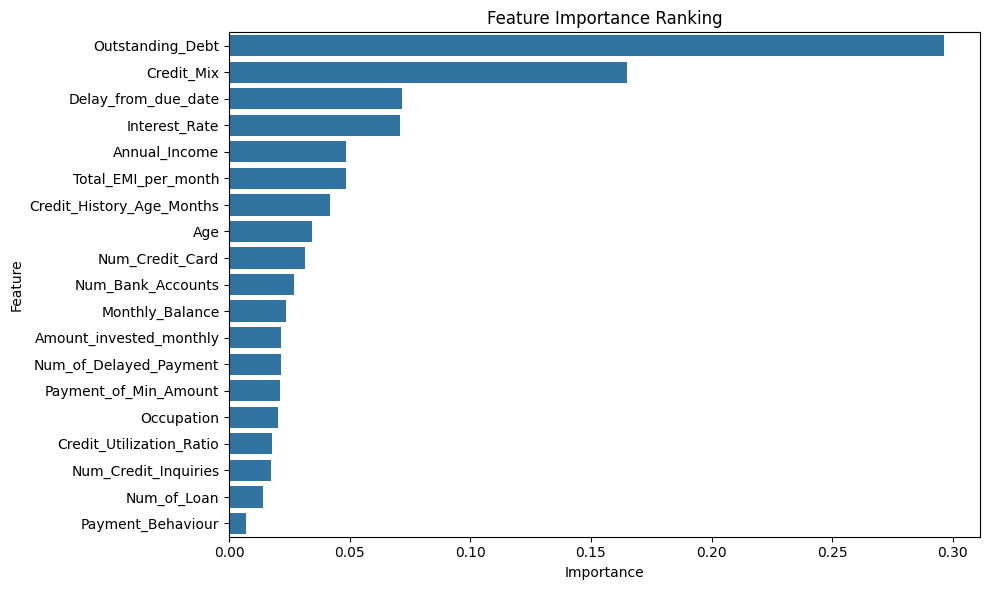

In [ ]:
#FIGURE 6. Barplot of Feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Feature Importance Ranking")
plt.tight_layout()
plt.show()

## Random forest:

In [ ]:
#FIGURE 7. Classification report for Random forest on Validation data, the 20% split of the original train dataset
# Evaluate the rt model with the simulated test Data = X_val and y_val
print("Random Forest Classifier Validation Set Performance:")
print(classification_report(y_val, y_pred, target_names=["Poor", "Standard", "Good"]))

Random Forest Classifier Validation Set Performance:
              precision    recall  f1-score   support

        Poor       0.78      0.80      0.79      5403
    Standard       0.81      0.81      0.81      9858
        Good       0.74      0.71      0.72      3196

    accuracy                           0.79     18457
   macro avg       0.78      0.77      0.77     18457
weighted avg       0.79      0.79      0.79     18457



# Discussion

The class imbalance appears to be the main factor limiting model performance. Without adjustment, the models favored the dominant class (Standard), leading to reduced performance for the minority classes (Poor, Good).

The EDA, class balance computation, and the accuracy as a function of max dapth graph highlighted model sensitivity to hyperparameters (max_depth and class_weight).

The best-performing model was the Random Forest, with an accuracy of 79%, compared to the 61% achieved by the Decision Tree. While this is a significant improvement, it still falls short of the accuracy needed for deployment in sensitive financial applications. Deploying a model with this level of performance could lead to incorrect credit decisions, such as denying loans to qualified applicants or approving high-risk individuals.

Finally, feature importance revealled that having outstanding debt, a mix of different types of credit accounts, the amount of day late from credit repayments, the amount of interest rates applied on an individuals loans and so forth (see, feature imporance plot) are the features that had the most determination power on the which credit score bracket an individual would be classified in.

# Conclusion

In conclusion, credit score classification is a critical but complex task for financial institutions. Using machine learning models like the ones developed in this project particularly Random Forest can help automate and optimize the process, reducing human workload and minimizing bias. However, the models need further tuning and improvement before deployment.

The Random Forest model achieved 79% accuracy, outperforming the Decision Tree, but this level of performance is not yet adequate for real-world applications. To improve results, future work should focus on addressing class imbalance, enhancing feature engineering, and possibly incorporating external data. With these refinements, AI-powered credit scoring systems can become powerful tools in modern financial decision-making.

# References

https://moodle.essex.ac.uk/pluginfile.php/2728309/mod_resource/content/2/MA336_ML_1.pdf

https://moodle.essex.ac.uk/pluginfile.php/2733176/mod_resource/content/2/MA336_ML_23.pdf

https://moodle.essex.ac.uk/pluginfile.php/2560468/mod_resource/content/2/decision_trees_titanic_solutions.ipynb





https://www.hsbc.co.uk/credit-cards/what-is-a-credit-score/

https://www.datacamp.com/tutorial/decision-tree-classification-python


https://matplotlib.org/stable/api/axes_api.html

https://scikit-learn.org/stable/modules/tree.html

https://seaborn.pydata.org/tutorial/categorical.html

https://www.ibm.com/think/topics/decision-trees


https://visualstudiomagazine.com/Articles/2023/03/17/scikit-classification.aspx#:~:text=A%20decision%20tree%20is%20a,data%20and%20the%20test%20data.

